<a href="https://colab.research.google.com/github/wdon021/From_Colab/blob/master/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!which python3

/usr/bin/python3


In [2]:
!pip install torchtext==0.2.3

     |████████████████████████████████| 51kB 8.7MB/s 
  Created wheel for torchtext: filename=torchtext-0.2.3-cp36-none-any.whl size=40134 sha256=a2ac71ad4c8ca3fb14ac7c6fde7ae17128057a3eabbc27cc585ea4c2485351f3
  Stored in directory: /root/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
Successfully built torchtext
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [3]:
!pip install torchvision==0.2.2

     |████████████████████████████████| 71kB 10.9MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
  Found existing installation: torchvision 0.4.1+cu100
    Uninstalling torchvision-0.4.1+cu100:
      Successfully uninstalled torchvision-0.4.1+cu100


In [0]:
import torchvision

In [5]:
!pip install fastai==0.7.0

     |████████████████████████████████| 122kB 26.3MB/s 
     |████████████████████████████████| 496.4MB 35kB/s 
     |████████████████████████████████| 1.5MB 70.5MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2661441 sha256=85c31f4a7f1a3abc0a1da97d539ac9e818d5245a18cfed883436008eb7b69784
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
  Found existing installation: torch 1.3.0+cu100
    Uninstalling torch-1.3.0+cu100:
      Successfully uninstalled torch-1.3.0+cu100
  Found existing installation: fastai 1.0.59
    Uninstalling fastai-1.0.59:
      Successfully uninstalled fastai-1.0.59


In [0]:
import torch.nn as nn

In [0]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *

In [0]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *

In [0]:
PATH = "/content/gdrive/My Drive/Fastai/"

In [0]:
import os
os.makedirs(PATH, exist_ok = True)

In [0]:
URL = "http://deeplearning.net/data/mnist/"
FILENAME = 'mnist.pkl.gz'
def load_mnist(filename):
  return pickle.load(gzip.open(filename, 'rb'), encoding='latin-1')

In [0]:
%ls /content/gdrive/My\ Drive/

 15032017151120-0001.pdf
 20170311.txt.gdoc
'Anyfile Notepad Files'/
 app/
 assignment_1_projections_file.gsheet
 assignment3.gsheet
 bathdata.xlsx
'Britain Elects   Public Opinion.gsheet'
'Colab Notebooks'/
 COMP102_2019.zip
'Copy of HbA1c Comparison  study (1).gsheet'
'Copy of HbA1c Comparison  study.gsheet'
'Copy of R-code-draft.R'
 cv.gdoc
'CV of danqing.gdoc'
 dass.gdoc
 data/
 eoi.docx
 eoi.docx.gdoc
 Fastai/
 Group1_Journalpaper.docx
'HC _ Illustrations.pdf'
 HospitalERCore.java
'Hua Li Depreciation 2016.pdf'
'Hua Li Income Statement 2016.pdf'
 img-814134807-0001.pdf
'InspectionID201741815754 (1).pdf'
 InspectionID201741815754.pdf
 invoice_34036.pdf
 Japan.gsheet
 KK/
 personal/
 QQ图片20140919102610.jpg
'REAA - NZ Residential Property Sale and Purchase Agreements Guide.pdf'
'stock list.xlsx'
 traffic-violations-in-maryland-county-20122018.zip
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document (3).gdoc'
'Untitled document (4).gdoc'
'Untitled document.gdoc

In [0]:
get_data(URL+FILENAME, PATH+FILENAME)
((x, y), (x_valid, y_valid), _) = load_mnist(PATH + FILENAME)

In [12]:
type(x), x.shape, type(y), y.shape

(numpy.ndarray, (50000, 784), numpy.ndarray, (50000,))

In [0]:
x[1]

In [13]:
mean = x.mean()
std = x.std()

x = (x-mean)/std
mean, std, x.mean(), x.std()

(0.13044983, 0.3072898, -3.1638146e-07, 0.99999934)

In [0]:
def show(img, title=None):
  plt.imshow(img, cmap="gray")
  if title is not None: plt.title(title)

In [0]:
def plots(ims, figsize=(12,6), rows=2, titles=None):
  f = plt.figure(figsize=figsize)
  cols = len(ims)//rows
  for i in range(len(ims)):
    sp = f.add_subplot(rows, cols, i+1)
    sp.axis('Off')
    if titles is not None: sp.set_title(titles[i], fontsize=16)
    plt.imshow(ims[i], cmap='gray')

In [16]:
x_valid.shape

(10000, 784)

In [0]:
??np.reshape

In [17]:
x_imgs = np.reshape(x_valid, (-1, 28, 28)); x_imgs.shape

(10000, 28, 28)

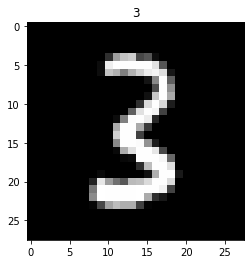

In [20]:
show(x_imgs[0], y_valid[0])

In [21]:
y_valid.shape

(10000,)

In [22]:
y_valid[0]

3

In [23]:
x_imgs[0, 10:20, 10:20]

array([[0.     , 0.     , 0.     , 0.     , 0.18359, 0.85156, 0.99219, 0.84375, 0.11328, 0.     ],
       [0.     , 0.     , 0.     , 0.37109, 0.87891, 0.99219, 0.95703, 0.25391, 0.     , 0.     ],
       [0.     , 0.04688, 0.5    , 0.98438, 0.99219, 0.92188, 0.15625, 0.     , 0.     , 0.     ],
       [0.     , 0.67188, 0.99219, 0.99219, 0.66406, 0.22656, 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.80859, 0.99219, 0.99219, 0.25391, 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.53516, 0.99219, 0.99219, 0.98047, 0.57031, 0.10156, 0.     , 0.     , 0.     ],
       [0.     , 0.03516, 0.67578, 0.875  , 0.99219, 0.99219, 0.89844, 0.27734, 0.     , 0.     ],
       [0.     , 0.     , 0.03125, 0.04688, 0.99219, 0.99219, 0.99219, 0.96094, 0.40625, 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.17969, 0.73828, 0.99219, 0.99219, 0.875  , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.06641, 0.68359, 0.99219, 0.99219, 0.09766]],
      dty

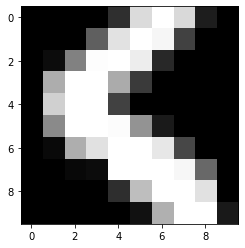

In [24]:
show(x_imgs[0, 10:20, 10:20])

In [0]:
#:8 means 到8 #### 8:means 从8开始

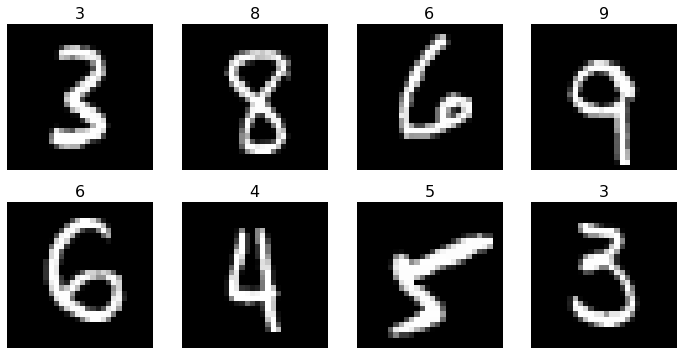

In [25]:
plots(x_imgs[:8], titles=y_valid[:8])